In [25]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPoint, Point

In [27]:
iucn_df1 = pd.read_csv('data/iucn/iucn_init1.csv')
iucn_df2 = pd.read_csv('data/iucn/iucn_init2.csv')

In [99]:
iucn_df1.dtypes

sci_name       object
legend         object
event_year      int64
longitude     float64
latitude      float64
dtype: object

In [100]:
iucn_df2.dtypes

sci_name       object
legend         object
event_year      int64
longitude     float64
latitude      float64
dtype: object

In [115]:
df = iucn_df2.groupby('sci_name').agg(list)

In [116]:
df.loc[:,'legend'] = [x[0] for x in df.legend]

In [117]:
def iucn_avg(nums):
    yrs = [yr for yr in nums if yr > 0]
    if len(yrs) == 0:
        return 0  # or return None, depending on your preference
    return round(sum(yrs)/len(yrs))

In [118]:
df.loc[:,'event_year'] = [iucn_avg(n) for n in df.event_year]

In [119]:
df

,legend,event_year,longitude,latitude
sci_name,,,,
Abantis bicolor,Extant (resident),1977,"[31.44849968, 31.7266674, 29.51413918, 31.7266...","[-28.89819527, -28.83063889, -31.607584, -28.8..."
Acantholebias quirogai,Extant (resident),0,"[-55.4333992, -55.3246994, -55.32389832, -54.9...","[-32.44469833, -32.61640167, -32.61629868, -32..."
Acrobrycon ortii,Extant (resident),0,[-63.501106],[-21.265711]
Acrogomphus malayanus,Extant (resident),1990,"[99.78832, 99.79268, 99.819, 99.81971, 103.879...","[6.36393, 6.361152, 6.369, 6.40209, 1.823, 4.2..."
Acrossocheilus jishouensis,Extant (resident),0,"[109.3889132, 109.4273605, 109.4356002, 109.48...","[28.4400523, 28.22248224, 28.07475646, 27.9170..."
...,...,...,...,...
Zephyrarchaea robinsi,Extant (resident),2004,"[118.3289, 118.2542, 118.25, 118.2503, 118.250...","[-34.365, -34.37611, -34.38111, -34.38028, -34..."
Zoogoneticus purhepechus,Extant (resident),2014,"[-104.0911, -103.8418, -103.5147, -102.6104, -...","[20.8823, 20.6898, 19.9555, 20.0623, 19.9372, ..."
Zoogoneticus quitzeoensis,Extant (resident),2014,"[-101.7879, -101.275, -101.1385]","[19.823, 19.6451, 19.922]"


In [120]:
gdf = gpd.GeoDataFrame(df[['legend','event_year']], 
                       geometry=[MultiPoint(gpd.points_from_xy(x,y)) for (x,y) in zip(df.longitude, df.latitude)],
                       crs="EPSG:4326")

In [121]:
gdf

,legend,event_year,geometry
sci_name,,,
Abantis bicolor,Extant (resident),1977,"MULTIPOINT (31.44850 -28.89820, 31.72667 -28.8..."
Acantholebias quirogai,Extant (resident),0,"MULTIPOINT (-55.43340 -32.44470, -55.32470 -32..."
Acrobrycon ortii,Extant (resident),0,MULTIPOINT (-63.50111 -21.26571)
Acrogomphus malayanus,Extant (resident),1990,"MULTIPOINT (99.78832 6.36393, 99.79268 6.36115..."
Acrossocheilus jishouensis,Extant (resident),0,"MULTIPOINT (109.38891 28.44005, 109.42736 28.2..."
...,...,...,...
Zephyrarchaea robinsi,Extant (resident),2004,"MULTIPOINT (118.32890 -34.36500, 118.25420 -34..."
Zoogoneticus purhepechus,Extant (resident),2014,"MULTIPOINT (-104.09110 20.88230, -103.84180 20..."
Zoogoneticus quitzeoensis,Extant (resident),2014,"MULTIPOINT (-101.78790 19.82300, -101.27500 19..."


In [122]:
gdf.to_file('data/iucn/iucn_geometry.geojson',driver='GeoJSON')

In [8]:
iucn_df2

,sci_name,legend,event_year,longitude,latitude
0,Hubbsina turneri,Extant (resident),2014,-101.479500,19.874500
1,Hubbsina turneri,Extant (resident),2014,-101.777300,19.825600
2,Hubbsina turneri,Extant (resident),2015,-101.787600,19.827300
3,Ictalurus mexicanus,Extant (resident),1971,-99.354170,21.980830
4,Ictalurus mexicanus,Extant (resident),1974,-99.300000,22.000000
...,...,...,...,...,...
56367,Belgrandiella sperchios,Extant (resident),0,22.363610,38.867650
56368,Sinocyclocheilus hyalinus,Extant (resident),0,103.733293,24.556080
56369,Sinocyclocheilus hyalinus,Extant (resident),0,103.749772,24.548585
56370,Sinocyclocheilus hyalinus,Extant (resident),0,103.750116,24.575439


In [29]:
gdf2 = gpd.GeoDataFrame(iucn_df2[['legend','event_year']],
                        geometry=gpd.points_from_xy(iucn_df2.longitude, iucn_df2.latitude),
                        crs="EPSG:4326")

<Axes: >

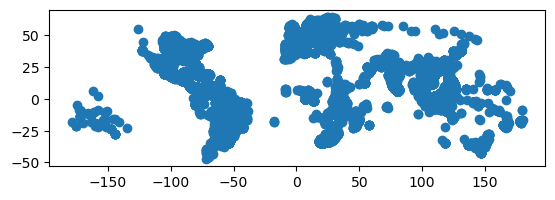

In [31]:
gdf2.plot()

In [22]:
gdf2.to_file('data/iucn/iucn_points.geojson',driver='GeoJSON')